# 1. Preparation

In [1]:
import pandas as pd
import numpy as np
import geopandas
# Read the sensor data file

#Store all the sensor GPS coordiates to 
#df = pd.read_csv(r"C:\Users\670274872\Desktop\Melbourne\Colab\Microclimate_Sensor_Locations.csv", sep=",")
#gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
#gdf.to_file("output.geo.json", driver='GeoJSON')

In [ ]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
my_map = folium.Map(
    location = [42.33, -71.10],
    zoom_start = 200
)
my_map

# 2. Data cleaning 

In [ ]:
df = pd.read_csv(r"C:\Users\670274872\Desktop\Melbourne\Colab\Microclimate_Sensor_Readings.csv")
#df.astype(str)
df

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,1,1001,arc1045,0a.EPA-1h,3.90,2019/11/15 09:00:00 AM,PM2.5-EPA-1h,ug/m^3
1,2,1001,arc1045,0a.EPA-1h.NOPK,3.90,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK,ug/m^3
2,3,1001,arc1045,0a.EPA-1h.NOPK.EPA-24h,5.50,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK-EPA-24h,ug/m^3
3,4,1001,arc1045,0a.EPA-1h.PKIND,1.00,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-PKIND,0/1
4,5,1001,arc1045,0a.EPA-24h,5.50,2019/11/15 09:00:00 AM,PM2.5-EPA-24h,ug/m^3
...,...,...,...,...,...,...,...,...
4028078,5421799,1016,arc1049,5b,56.77,2022/05/28 02:15:02 PM,TPH.RH,%
4028079,5421803,1016,arc1049,5b.EPA-1h,57.19,2022/05/28 02:00:00 PM,TPH.RH-EPA-1h,%
4028080,5421804,1016,arc1049,5c,1011.30,2022/05/28 02:15:02 PM,TPH.PRESSURE,hPa
4028081,5421808,1016,arc1049,6,5.08,2022/05/28 02:15:03 PM,WS,km/h


In [ ]:
dfdropna=df.dropna()
dfdropna

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,1,1001,arc1045,0a.EPA-1h,3.90,2019/11/15 09:00:00 AM,PM2.5-EPA-1h,ug/m^3
1,2,1001,arc1045,0a.EPA-1h.NOPK,3.90,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK,ug/m^3
2,3,1001,arc1045,0a.EPA-1h.NOPK.EPA-24h,5.50,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK-EPA-24h,ug/m^3
3,4,1001,arc1045,0a.EPA-1h.PKIND,1.00,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-PKIND,0/1
4,5,1001,arc1045,0a.EPA-24h,5.50,2019/11/15 09:00:00 AM,PM2.5-EPA-24h,ug/m^3
...,...,...,...,...,...,...,...,...
4028078,5421799,1016,arc1049,5b,56.77,2022/05/28 02:15:02 PM,TPH.RH,%
4028079,5421803,1016,arc1049,5b.EPA-1h,57.19,2022/05/28 02:00:00 PM,TPH.RH-EPA-1h,%
4028080,5421804,1016,arc1049,5c,1011.30,2022/05/28 02:15:02 PM,TPH.PRESSURE,hPa
4028081,5421808,1016,arc1049,6,5.08,2022/05/28 02:15:03 PM,WS,km/h


In [ ]:
df.to_csv(r"C:\Users\670274872\Desktop\Melbourne\Colab\My_ouput.csv",index=False)

In [ ]:
a = pd.read_csv(r'C:\Users\670274872\Desktop\Melbourne\Colab\My_ouput.csv')

In [ ]:
a.head(100)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,1,1001,arc1045,0a.EPA-1h,3.90,2019/11/15 09:00:00 AM,PM2.5-EPA-1h,ug/m^3
1,2,1001,arc1045,0a.EPA-1h.NOPK,3.90,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK,ug/m^3
2,3,1001,arc1045,0a.EPA-1h.NOPK.EPA-24h,5.50,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK-EPA-24h,ug/m^3
3,4,1001,arc1045,0a.EPA-1h.PKIND,1.00,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-PKIND,0/1
4,5,1001,arc1045,0a.EPA-24h,5.50,2019/11/15 09:00:00 AM,PM2.5-EPA-24h,ug/m^3
...,...,...,...,...,...,...,...,...
95,114,1002,arc1046,5a,14.83,2019/11/15 09:30:01 AM,TPH.TEMP,C
96,115,1002,arc1046,5b,63.24,2019/11/15 09:30:01 AM,TPH.RH,%
97,116,1002,arc1046,5c,1007.30,2019/11/15 09:30:01 AM,TPH.PRESSURE,hPa
98,117,1002,arc1046,6,7.60,2019/11/15 09:30:01 AM,WS,km/h


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028083 entries, 0 to 4028082
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   site_id         int64  
 2   gateway_hub_id  object 
 3   sensor_id       object 
 4   value           float64
 5   local_time      object 
 6   type            object 
 7   units           object 
dtypes: float64(1), int64(2), object(5)
memory usage: 245.9+ MB


In [ ]:
d = a.loc[(a.site_id == 1001) & (a.type == "TPH_TEMP")]
d

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units


In [ ]:
#Output data
#i=1001
#while i < 1017:
#  w = a[(a.site_id == i) & (a.type == "PM10") ]
#  w.to_csv(f'/content/drive/MyDrive/Colab Notebooks/PM10/{i}-PM10.csv',local_time=False)
#  i=i+1
#w

In [ ]:
#Read data
fp = r"C:\Users\670274872\Desktop\Melbourne\Colab\TPH.TEMP\1009\1009-TPH.TEMP.csv"

data = pd.read_csv(fp)
data.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,5421575,1009,arc1050,5a,14.40,2022/05/28 02:30:02 PM,TPH.TEMP,C
1,5421576,1009,arc1050,5a,14.41,2022/05/28 02:45:02 PM,TPH.TEMP,C
2,5421577,1009,arc1050,5a,14.50,2022/05/28 03:00:02 PM,TPH.TEMP,C
3,5363501,1009,arc1050,5a,15.54,2022/05/20 01:30:02 PM,TPH.TEMP,C
4,5363502,1009,arc1050,5a,15.57,2022/05/20 01:45:02 PM,TPH.TEMP,C
5,5363503,1009,arc1050,5a,15.71,2022/05/20 02:00:02 PM,TPH.TEMP,C
6,5363812,1009,arc1050,5a,15.57,2022/05/20 02:15:02 PM,TPH.TEMP,C
7,3795365,1009,arc1050,5a,18.86,2021/11/26 05:00:02 PM,TPH.TEMP,C
8,3095707,1009,arc1050,5a,14.04,2021/09/07 10:45:02 AM,TPH.TEMP,C
9,3252917,1009,arc1050,5a,13.68,2021/09/30 03:00:02 AM,TPH.TEMP,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33281 entries, 0 to 33280
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              33281 non-null  int64  
 1   site_id         33281 non-null  int64  
 2   gateway_hub_id  33281 non-null  object 
 3   sensor_id       33281 non-null  object 
 4   value           33090 non-null  float64
 5   local_time      33281 non-null  object 
 6   type            33281 non-null  object 
 7   units           33281 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
# Select only time and temperature values
dataframe = pd.DataFrame(data,columns=['local_time', 'value'])
#df_reset=dataframe.set_index('local_time') # drop the index
dataframe 

,local_time,value
0,2022/05/28 02:30:02 PM,14.40
1,2022/05/28 02:45:02 PM,14.41
2,2022/05/28 03:00:02 PM,14.50
3,2022/05/20 01:30:02 PM,15.54
4,2022/05/20 01:45:02 PM,15.57
...,...,...
33276,2022/05/28 01:15:02 PM,13.85
33277,2022/05/28 01:30:02 PM,14.56
33278,2022/05/28 01:45:02 PM,14.97
33279,2022/05/28 02:00:02 PM,15.04


In [ ]:
#Create a new dataframe
dataframe['Dates'] = pd.to_datetime(dataframe['local_time']).dt.date
dataframe['Time'] = pd.to_datetime(dataframe['local_time']).dt.time
dataframe1 = pd.DataFrame(dataframe,columns=['Dates','Time', 'value'])
#df_reset=dataframe.set_index('Dates') # drop the index
#df_reset.sort_values(by='Dates')

#df_reset.head(100)
dataframe1

,Dates,Time,value
0,2022-05-28,14:30:02,14.40
1,2022-05-28,14:45:02,14.41
2,2022-05-28,15:00:02,14.50
3,2022-05-20,13:30:02,15.54
4,2022-05-20,13:45:02,15.57
...,...,...,...
33276,2022-05-28,13:15:02,13.85
33277,2022-05-28,13:30:02,14.56
33278,2022-05-28,13:45:02,14.97
33279,2022-05-28,14:00:02,15.04


In [ ]:
#Sort the data by date series
df1 = dataframe1.sort_values(by="Dates")
df1
#df1['Dates'] = pd.to_datetime(df1['Dates'], dayfirst=True)
#df1

,Dates,Time,value
58,2021-06-15,19:45:02,13.45
55,2021-06-15,18:30:02,13.64
54,2021-06-15,18:45:02,13.73
53,2021-06-15,19:00:02,13.52
52,2021-06-15,17:15:02,14.83
...,...,...,...
32855,2022-06-03,11:00:02,10.94
32854,2022-06-03,10:45:02,10.84
32853,2022-06-03,10:30:02,10.61
32768,2022-06-03,05:30:02,9.16


In [ ]:
df_reset1=dataframe.set_index('Dates') # drop the index
df_reset1

,local_time,value,Time
Dates,,,
2022-05-28,2022/05/28 02:30:02 PM,14.40,14:30:02
2022-05-28,2022/05/28 02:45:02 PM,14.41,14:45:02
2022-05-28,2022/05/28 03:00:02 PM,14.50,15:00:02
2022-05-20,2022/05/20 01:30:02 PM,15.54,13:30:02
2022-05-20,2022/05/20 01:45:02 PM,15.57,13:45:02
...,...,...,...
2022-05-28,2022/05/28 01:15:02 PM,13.85,13:15:02
2022-05-28,2022/05/28 01:30:02 PM,14.56,13:30:02
2022-05-28,2022/05/28 01:45:02 PM,14.97,13:45:02


In [ ]:
import numpy as np
import pandas as pd
df1['Dates'] = pd.to_datetime(df1['Dates'], dayfirst=True)
df1

,Dates,Time,value
58,2021-06-15,19:45:02,13.45
55,2021-06-15,18:30:02,13.64
54,2021-06-15,18:45:02,13.73
53,2021-06-15,19:00:02,13.52
52,2021-06-15,17:15:02,14.83
...,...,...,...
32855,2022-06-03,11:00:02,10.94
32854,2022-06-03,10:45:02,10.84
32853,2022-06-03,10:30:02,10.61
32768,2022-06-03,05:30:02,9.16


In [ ]:
mask = (df1['Dates'] > '2021-6-15') & (df1['Dates'] <= '2021-6-16')
df2=df1.loc[mask].sort_values(by="Time")
df2

,Dates,Time,value
76,2021-06-16,00:00:02,12.76
80,2021-06-16,00:15:02,12.73
78,2021-06-16,00:30:02,12.71
79,2021-06-16,00:45:02,12.76
77,2021-06-16,01:00:02,12.69
...,...,...,...
165,2021-06-16,22:45:02,11.37
167,2021-06-16,23:00:02,11.52
171,2021-06-16,23:15:02,11.33
170,2021-06-16,23:30:02,11.31


Text(0.5, 1.0, 'Sensor 1009')

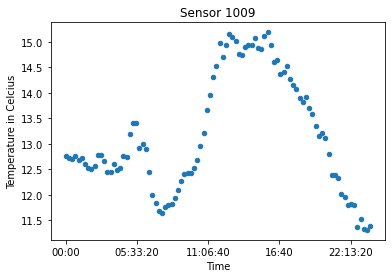

In [ ]:
# Plot the data as a time series

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
df2.plot(kind = 'scatter', x = 'Time', y = 'value')

plt.xlabel("Time")
plt.ylabel("Temperature in Celcius")
plt.title("Sensor 1009")

# Display

#plt.show()

# 3. Plot temperatures of sensor cluster 1009 and 1014

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\TPH.TEMP\1009'

#fp = r"/content/drive/MyDrive/Colab Notebooks/TPH.TEMP/1009-TPH.TEMP.csv"


# Read CSV files from List
fp1 = pd.concat(map(pd.read_csv, [path + "/1008-TPH.TEMP.csv", path + "/1009-TPH.TEMP.csv",path + "/1014-TPH.TEMP.csv"]))

fp1.head(50)


,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,3095619,1008,arc1045,5a,14.59,2021/09/07 10:45:02 AM,TPH.TEMP,C
1,3095648,1008,arc1045,5a,14.03,2021/09/07 10:30:02 AM,TPH.TEMP,C
2,3124427,1008,arc1045,5a,6.58,2021/09/13 02:45:02 AM,TPH.TEMP,C
3,3124516,1008,arc1045,5a,6.50,2021/09/13 03:00:02 AM,TPH.TEMP,C
4,3124553,1008,arc1045,5a,6.72,2021/09/13 02:30:02 AM,TPH.TEMP,C
5,3095791,1008,arc1045,5a,15.96,2021/09/07 11:30:02 AM,TPH.TEMP,C
6,3095794,1008,arc1045,5a,14.68,2021/09/07 11:45:02 AM,TPH.TEMP,C
7,3095913,1008,arc1045,5a,16.37,2021/09/07 12:00:02 PM,TPH.TEMP,C
8,2808206,1008,arc1045,5a,13.46,2021/06/15 11:00:02 AM,TPH.TEMP,C
9,2808217,1008,arc1045,5a,12.45,2021/06/15 10:45:02 AM,TPH.TEMP,C


In [ ]:
#Create a new dataframe
fp1['Dates'] = pd.to_datetime(fp1['local_time']).dt.date
fp1['Time'] = pd.to_datetime(fp1['local_time']).dt.time
fp1 = pd.DataFrame(fp1,columns=[ 'site_id', 'Dates','Time', 'value'])
#df_reset=dataframe.set_index('Dates') # drop the index
#df_reset.sort_values(by='Dates')

fp1

,site_id,Dates,Time,value
0,1008,2021-09-07,10:45:02,14.59
1,1008,2021-09-07,10:30:02,14.03
2,1008,2021-09-13,02:45:02,6.58
3,1008,2021-09-13,03:00:02,6.50
4,1008,2021-09-13,02:30:02,6.72
...,...,...,...,...
24072,1014,2022-05-28,12:30:02,14.37
24073,1014,2022-05-28,12:45:02,14.49
24074,1014,2022-05-28,13:00:02,13.97
24075,1014,2022-05-28,14:00:02,14.11


In [ ]:
import numpy as np
import pandas as pd
fp1['Dates'] = pd.to_datetime(fp1['Dates'], dayfirst=True)
df1

,Dates,Time,value
58,2021-06-15,19:45:02,13.45
55,2021-06-15,18:30:02,13.64
54,2021-06-15,18:45:02,13.73
53,2021-06-15,19:00:02,13.52
52,2021-06-15,17:15:02,14.83
...,...,...,...
32855,2022-06-03,11:00:02,10.94
32854,2022-06-03,10:45:02,10.84
32853,2022-06-03,10:30:02,10.61
32768,2022-06-03,05:30:02,9.16


In [ ]:
mask = (fp1['Dates'] > '2022-1-27') & (fp1['Dates'] <= '2022-1-28')
df2=fp1.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
df2

,site_id,Dates,Time,value
17346,1009,2022-01-28,00:00:02,23.74
8159,1014,2022-01-28,00:00:02,23.21
17394,1009,2022-01-28,00:15:01,23.75
8165,1014,2022-01-28,00:15:02,23.31
8366,1014,2022-01-28,00:30:02,23.41
...,...,...,...,...
11664,1014,2022-01-28,23:15:02,20.00
11745,1014,2022-01-28,23:30:02,19.78
20234,1009,2022-01-28,23:30:02,20.34
11744,1014,2022-01-28,23:45:02,19.62


In [ ]:
sensor_1009 = df2[df2.site_id == 1009]
sensor_1009

,site_id,Dates,Time,value
17346,1009,2022-01-28,00:00:02,23.74
17394,1009,2022-01-28,00:15:01,23.75
17592,1009,2022-01-28,00:30:02,23.85
17593,1009,2022-01-28,00:45:02,23.80
17594,1009,2022-01-28,01:00:02,24.09
...,...,...,...,...
20881,1009,2022-01-28,22:45:02,20.94
20877,1009,2022-01-28,23:00:02,20.83
20889,1009,2022-01-28,23:15:02,20.54
20234,1009,2022-01-28,23:30:02,20.34


In [ ]:
sensor_1014 = df2[df2.site_id == 1014] 
sensor_1014

,site_id,Dates,Time,value
8159,1014,2022-01-28,00:00:02,23.21
8165,1014,2022-01-28,00:15:02,23.31
8366,1014,2022-01-28,00:30:02,23.41
8365,1014,2022-01-28,00:45:02,23.60
8364,1014,2022-01-28,01:00:02,23.75
...,...,...,...,...
11656,1014,2022-01-28,22:45:02,20.02
11655,1014,2022-01-28,23:00:02,20.15
11664,1014,2022-01-28,23:15:02,20.00
11745,1014,2022-01-28,23:30:02,19.78


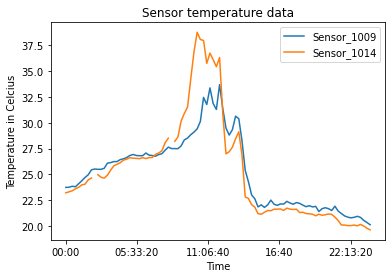

In [ ]:
# Plot the data as a time series

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1009, sensor_1014]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1009','Sensor_1014'])
plt.xlabel("Time")
plt.ylabel("Temperature in Celcius")

plt.title("Sensor temperature data")

#plt.legend('1009',loc="upper left")

plt.show()





# 4. Plot PM2.5 of sensor cluster 1009 and 1014



In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\PM2.5\1009'

#fp = r"/content/drive/MyDrive/Colab Notebooks/PM2.5/1009-PM2.5.csv"


# Read CSV files from List
fp1_1 = pd.concat(map(pd.read_csv, [path + "/1008-PM2.5.csv", path + "/1009-PM2.5.csv",path + "/1014-PM2.5.csv"]))

fp1_1.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,3095628,1008,arc1045,0a,5.2,2021/09/07 11:00:11 AM,PM2.5,ug/m^3
1,3095695,1008,arc1045,0a,4.9,2021/09/07 10:45:11 AM,PM2.5,ug/m^3
2,3124464,1008,arc1045,0a,13.4,2021/09/13 02:45:11 AM,PM2.5,ug/m^3
3,3124579,1008,arc1045,0a,16.0,2021/09/13 02:30:11 AM,PM2.5,ug/m^3
4,3095859,1008,arc1045,0a,5.4,2021/09/07 12:00:11 PM,PM2.5,ug/m^3
5,3095885,1008,arc1045,0a,5.8,2021/09/07 11:45:11 AM,PM2.5,ug/m^3
6,3095929,1008,arc1045,0a,5.3,2021/09/07 11:30:11 AM,PM2.5,ug/m^3
7,2808212,1008,arc1045,0a,9.0,2021/06/15 12:00:11 PM,PM2.5,ug/m^3
8,2808233,1008,arc1045,0a,10.5,2021/06/15 10:30:11 AM,PM2.5,ug/m^3
9,2808242,1008,arc1045,0a,12.1,2021/06/15 10:45:11 AM,PM2.5,ug/m^3


In [ ]:
#Create a new dataframe
fp1_1['Dates'] = pd.to_datetime(fp1_1['local_time']).dt.date
fp1_1['Time'] = pd.to_datetime(fp1_1['local_time']).dt.time
fp1_1 = pd.DataFrame(fp1_1,columns=[ 'site_id', 'Dates','Time', 'value'])
#df_reset=dataframe.set_index('Dates') # drop the index
#df_reset.sort_values(by='Dates')

In [ ]:
import numpy as np
import pandas as pd
fp1_1['Dates'] = pd.to_datetime(fp1_1['Dates'], dayfirst=True)
df1

,Dates,Time,value
58,2021-06-15,19:45:02,13.45
55,2021-06-15,18:30:02,13.64
54,2021-06-15,18:45:02,13.73
53,2021-06-15,19:00:02,13.52
52,2021-06-15,17:15:02,14.83
...,...,...,...
32855,2022-06-03,11:00:02,10.94
32854,2022-06-03,10:45:02,10.84
32853,2022-06-03,10:30:02,10.61
32768,2022-06-03,05:30:02,9.16


In [ ]:
mask = (fp1_1['Dates'] > '2022-1-27') & (fp1_1['Dates'] <= '2022-1-28')
df2=fp1_1.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
df2

,site_id,Dates,Time,value
17388,1009,2022-01-28,00:00:11,4.8
8106,1014,2022-01-28,00:00:11,6.3
17391,1009,2022-01-28,00:15:10,5.1
8149,1014,2022-01-28,00:15:11,5.9
17593,1009,2022-01-28,00:30:11,5.3
...,...,...,...,...
20896,1009,2022-01-28,23:15:11,8.3
20978,1009,2022-01-28,23:30:11,9.2
11746,1014,2022-01-28,23:30:11,9.0
20977,1009,2022-01-28,23:45:11,7.4


In [ ]:
sensor_1009 = df2[df2.site_id == 1009]
sensor_1009
sensor_1014 = df2[df2.site_id == 1014]
sensor_1014

,site_id,Dates,Time,value
8106,1014,2022-01-28,00:00:11,6.3
8149,1014,2022-01-28,00:15:11,5.9
8354,1014,2022-01-28,00:30:11,6.1
8353,1014,2022-01-28,00:45:11,7.0
8352,1014,2022-01-28,01:00:11,6.6
...,...,...,...,...
11659,1014,2022-01-28,22:45:11,8.6
11653,1014,2022-01-28,23:00:11,9.1
11663,1014,2022-01-28,23:15:11,7.3
11746,1014,2022-01-28,23:30:11,9.0


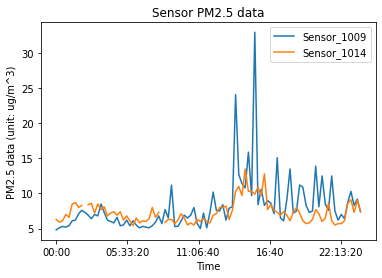

In [ ]:
# Plot the data as a time series

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1009, sensor_1014]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1009','Sensor_1014'])
plt.xlabel("Time")
plt.ylabel("PM2.5 data (unit: ug/m^3)")

plt.title("Sensor PM2.5 data")


plt.show()

In [ ]:
my_map = folium.Map(
    location = [-37.81748684, 144.967228],
    zoom_start = 50
)
my_map

*# 5. Plot temperatures of sensor cluster 1006, 1007, 1010 and 1011*

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\TPH.TEMP\1006'

#fp = r"/content/drive/MyDrive/Colab Notebooks/TPH.TEMP/1009-TPH.TEMP.csv"


# Read CSV files from List
fp1 = pd.concat(map(pd.read_csv, [path + "/1006-TPH.TEMP.csv",path + "/1007-TPH.TEMP.csv", path + "/1010-TPH.TEMP.csv",path + "/1011-TPH.TEMP.csv"]))

fp1.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,2712366,1006,arc1112,5a,12.69,2021/06/02 09:15:02 AM,TPH.TEMP,C
1,2712420,1006,arc1112,5a,12.94,2021/06/02 09:30:02 AM,TPH.TEMP,C
2,2712461,1006,arc1112,5a,12.58,2021/06/02 09:00:02 AM,TPH.TEMP,C
3,2712521,1006,arc1112,5a,12.32,2021/06/02 08:15:02 AM,TPH.TEMP,C
4,2712529,1006,arc1112,5a,13.37,2021/06/02 09:45:02 AM,TPH.TEMP,C
5,2712531,1006,arc1112,5a,12.39,2021/06/02 08:30:02 AM,TPH.TEMP,C
6,2712538,1006,arc1112,5a,12.47,2021/06/02 08:45:02 AM,TPH.TEMP,C
7,2712552,1006,arc1112,5a,14.03,2021/06/02 10:00:02 AM,TPH.TEMP,C
8,2712636,1006,arc1112,5a,16.64,2021/05/23 06:30:02 PM,TPH.TEMP,C
9,2712688,1006,arc1112,5a,12.42,2021/05/26 03:00:02 AM,TPH.TEMP,C


In [ ]:
#Create a new dataframe
import numpy as np
import pandas as pd
fp1['Dates'] = pd.to_datetime(fp1['local_time']).dt.date
fp1['Time'] = pd.to_datetime(fp1['local_time']).dt.time
fp1 = pd.DataFrame(fp1,columns=[ 'site_id', 'Dates','Time', 'value'])
fp1['Dates'] = pd.to_datetime(fp1['Dates'], dayfirst=True)
mask = (fp1['Dates'] > '2022-1-27') & (fp1['Dates'] <= '2022-1-28')
df2=fp1.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
sensor_1006 = df2[df2.site_id == 1006]
sensor_1007 = df2[df2.site_id == 1007]
sensor_1010 = df2[df2.site_id == 1010]
sensor_1011 = df2[df2.site_id == 1011]

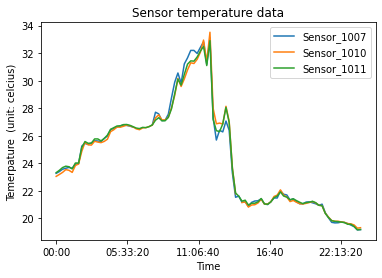

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1007, sensor_1010 ,sensor_1011]:
    plt.plot(frame['Time'], frame['value'])

plt.legend(['Sensor_1007','Sensor_1010','Sensor_1011'])
plt.xlabel("Time")
plt.ylabel("Temerpature  (unit: celcius)")

plt.title("Sensor temperature data")
plt.show()

# 6. Plot PM2.5 of sensor cluster 1006, 1007, 1010 and 1011

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\PM2.5\1006'

#fp = r"/content/drive/MyDrive/Colab Notebooks/PM2.5/1009-TPH.TEMP.csv"


# Read CSV files from List
fp1 = pd.concat(map(pd.read_csv, [path + "/1006-PM2.5.csv",path + "/1007-PM2.5.csv", path + "/1010-PM2.5.csv",path + "/1011-PM2.5.csv"]))

fp1.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,2712398,1006,arc1112,0a,5.2,2021/06/02 09:45:11 AM,PM2.5,ug/m^3
1,2712460,1006,arc1112,0a,5.9,2021/06/02 09:00:11 AM,PM2.5,ug/m^3
2,2712463,1006,arc1112,0a,6.3,2021/06/02 09:15:11 AM,PM2.5,ug/m^3
3,2712514,1006,arc1112,0a,5.4,2021/06/02 10:00:11 AM,PM2.5,ug/m^3
4,2712522,1006,arc1112,0a,6.1,2021/06/02 09:30:11 AM,PM2.5,ug/m^3
5,2712539,1006,arc1112,0a,6.1,2021/06/02 08:45:11 AM,PM2.5,ug/m^3
6,2712553,1006,arc1112,0a,5.7,2021/06/02 08:15:11 AM,PM2.5,ug/m^3
7,2712558,1006,arc1112,0a,6.9,2021/06/02 08:30:11 AM,PM2.5,ug/m^3
8,2712606,1006,arc1112,0a,7.7,2021/05/24 02:45:11 AM,PM2.5,ug/m^3
9,2712643,1006,arc1112,0a,9.1,2021/05/21 01:15:10 PM,PM2.5,ug/m^3


In [ ]:
#Create a new dataframe
import numpy as np
import pandas as pd
fp1['Dates'] = pd.to_datetime(fp1['local_time']).dt.date
fp1['Time'] = pd.to_datetime(fp1['local_time']).dt.time
fp1 = pd.DataFrame(fp1,columns=[ 'site_id', 'Dates','Time', 'value'])
fp1['Dates'] = pd.to_datetime(fp1['Dates'], dayfirst=True)
mask = (fp1['Dates'] > '2022-1-27') & (fp1['Dates'] <= '2022-1-28')
df2=fp1.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
sensor_1006 = df2[df2.site_id == 1006]
sensor_1007 = df2[df2.site_id == 1007]
sensor_1010 = df2[df2.site_id == 1010]
sensor_1011 = df2[df2.site_id == 1011]

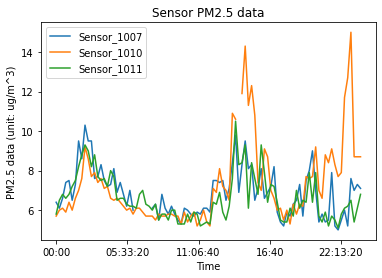

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1007,sensor_1010 ,sensor_1011]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1007','Sensor_1010','Sensor_1011'])
plt.xlabel("Time")
plt.ylabel("PM2.5 data (unit: ug/m^3)")

plt.title("Sensor PM2.5 data")


plt.show()

# 7. Plot relative humidity of sensor cluster **1009** and 1014

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\TPH.RH\1009'

#fp = r"/content/drive/MyDrive/Colab Notebooks/PM2.5/1009-TPH.TEMP.csv"


# Read CSV files from List
fp4 = pd.concat(map(pd.read_csv, [path + "/1008-TPH.RH.csv",path + "/1009-TPH.RH.csv", path + "/1014-TPH.RH.csv"]))

fp4.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,3095637,1008,arc1045,5b,63.34,2021/09/07 10:30:02 AM,TPH.RH,%
1,3095659,1008,arc1045,5b,56.56,2021/09/07 11:00:02 AM,TPH.RH,%
2,3124448,1008,arc1045,5b,88.14,2021/09/13 02:45:02 AM,TPH.RH,%
3,3124518,1008,arc1045,5b,88.33,2021/09/13 03:00:02 AM,TPH.RH,%
4,3124548,1008,arc1045,5b,88.13,2021/09/13 02:30:02 AM,TPH.RH,%
5,3095786,1008,arc1045,5b,54.26,2021/09/07 11:30:02 AM,TPH.RH,%
6,3095798,1008,arc1045,5b,59.04,2021/09/07 11:45:02 AM,TPH.RH,%
7,3095935,1008,arc1045,5b,55.72,2021/09/07 12:00:02 PM,TPH.RH,%
8,2808213,1008,arc1045,5b,61.01,2021/06/15 11:00:02 AM,TPH.RH,%
9,2808215,1008,arc1045,5b,64.82,2021/06/15 10:45:02 AM,TPH.RH,%


In [ ]:
#Create a new dataframe
import numpy as np
import pandas as pd
fp4['Dates'] = pd.to_datetime(fp4['local_time']).dt.date
fp4['Time'] = pd.to_datetime(fp4['local_time']).dt.time
fp4 = pd.DataFrame(fp4,columns=[ 'site_id', 'Dates','Time', 'value'])
fp4['Dates'] = pd.to_datetime(fp4['Dates'], dayfirst=True)
mask = (fp4['Dates'] > '2022-1-27') & (fp4['Dates'] <= '2022-1-28')
df2=fp4.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
sensor_1008= df2[df2.site_id == 1008]
sensor_1009 = df2[df2.site_id == 1009]
sensor_1014 = df2[df2.site_id == 1014]

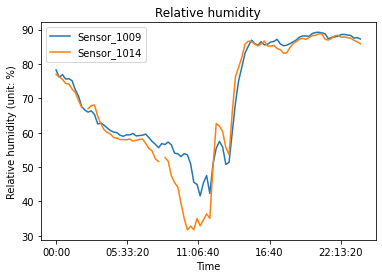

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1009 ,sensor_1014]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1009','Sensor_1014'])
plt.xlabel("Time")
plt.ylabel("Relative humidity (unit: %)")

plt.title("Relative humidity")


plt.show()

# 8. Plot wind speed of sensor cluster 1009 and 1014

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\WS\1009'

#fp = r"/content/drive/MyDrive/Colab Notebooks/PM2.5/1009-TPH.TEMP.csv"


# Read CSV files from List
fp4 = pd.concat(map(pd.read_csv, [path + "/1008-WS.csv",path + "/1009-WS.csv", path + "/1014-WS.csv"]))

fp4.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,3095643,1008,arc1045,6,7.38,2021/09/07 11:00:03 AM,WS,km/h
1,3095676,1008,arc1045,6,7.99,2021/09/07 10:45:03 AM,WS,km/h
2,3095728,1008,arc1045,6,7.67,2021/09/07 11:15:04 AM,WS,km/h
3,3124525,1008,arc1045,6,5.33,2021/09/13 02:30:03 AM,WS,km/h
4,3124537,1008,arc1045,6,5.90,2021/09/13 02:45:03 AM,WS,km/h
5,3095804,1008,arc1045,6,7.63,2021/09/07 11:30:03 AM,WS,km/h
6,3095863,1008,arc1045,6,7.78,2021/09/07 12:00:03 PM,WS,km/h
7,2808781,1008,arc1045,6,4.97,2021/06/15 02:45:03 PM,WS,km/h
8,2808204,1008,arc1045,6,4.57,2021/06/15 11:15:03 AM,WS,km/h
9,2808209,1008,arc1045,6,4.61,2021/06/15 12:00:03 PM,WS,km/h


In [ ]:
#Create a new dataframe
import numpy as np
import pandas as pd
fp4['Dates'] = pd.to_datetime(fp4['local_time']).dt.date
fp4['Time'] = pd.to_datetime(fp4['local_time']).dt.time
fp4 = pd.DataFrame(fp4,columns=[ 'site_id', 'Dates','Time', 'value'])
fp4['Dates'] = pd.to_datetime(fp4['Dates'], dayfirst=True)
mask = (fp4['Dates'] > '2022-1-27') & (fp4['Dates'] <= '2022-1-28')
df2=fp4.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
sensor_1008= df2[df2.site_id == 1008]
sensor_1009 = df2[df2.site_id == 1009]
sensor_1014 = df2[df2.site_id == 1014]

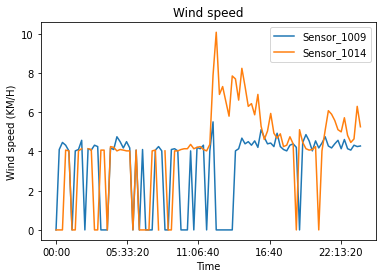

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1009 ,sensor_1014]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1009','Sensor_1014'])
plt.xlabel("Time")
plt.ylabel("Wind speed (KM/H)")

plt.title("Wind speed")


plt.show()

# 9. Plot wind speed of sensor cluster 1006, 1007, 1010 and 1011

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab\WS\1006'

#fp = r"/content/drive/MyDrive/Colab Notebooks/PM2.5/1009-TPH.TEMP.csv"


# Read CSV files from List
fp4 = pd.concat(map(pd.read_csv, [path + "/1006-WS.csv",path + "/1007-WS.csv",path + "/1010-WS.csv", path + "/1011-WS.csv"]))

fp4.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,2718516,1006,arc1112,6,4.79,2021/05/24 06:00:03 AM,WS,km/h
1,2719983,1006,arc1112,6,7.70,2021/05/26 04:00:03 AM,WS,km/h
2,2720187,1006,arc1112,6,6.62,2021/05/27 08:00:03 PM,WS,km/h
3,2720372,1006,arc1112,6,8.46,2021/05/31 06:00:03 PM,WS,km/h
4,2712400,1006,arc1112,6,7.81,2021/06/02 08:30:03 AM,WS,km/h
5,2712459,1006,arc1112,6,7.56,2021/06/02 08:45:03 AM,WS,km/h
6,2712479,1006,arc1112,6,8.21,2021/06/02 09:30:03 AM,WS,km/h
7,2712505,1006,arc1112,6,8.53,2021/06/02 09:45:03 AM,WS,km/h
8,2712573,1006,arc1112,6,9.04,2021/06/02 09:15:03 AM,WS,km/h
9,2712578,1006,arc1112,6,8.53,2021/06/02 10:00:03 AM,WS,km/h


In [ ]:
#Create a new dataframe
import numpy as np
import pandas as pd
fp4['Dates'] = pd.to_datetime(fp4['local_time']).dt.date
fp4['Time'] = pd.to_datetime(fp4['local_time']).dt.time
fp4 = pd.DataFrame(fp4,columns=[ 'site_id', 'Dates','Time', 'value'])
fp4['Dates'] = pd.to_datetime(fp4['Dates'], dayfirst=True)
mask = (fp4['Dates'] > '2022-1-27') & (fp4['Dates'] <= '2022-1-28')
df2=fp4.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
sensor_1006= df2[df2.site_id == 1006]
sensor_1007 = df2[df2.site_id == 1007]
sensor_1010 = df2[df2.site_id == 1010]
sensor_1011 = df2[df2.site_id == 1011]

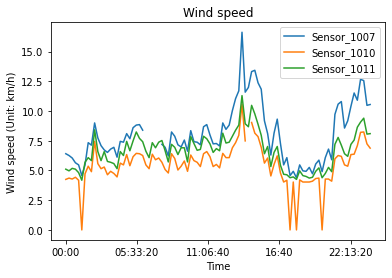

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1007,sensor_1010,sensor_1011]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1007','Sensor_1010','Sensor_1011'])
plt.xlabel("Time")
plt.ylabel("Wind speed (Unit: km/h)")

plt.title("Wind speed")


plt.show()

# 10. Plot relative humidity of sensor cluster 1006, 1007, 1010 and 1011

In [ ]:
#Read multiple csv files 
import glob

path =r'C:\Users\670274872\Desktop\Melbourne\Colab/TPH.RH/1006'

#fp = r"/content/drive/MyDrive/Colab Notebooks/PM2.5/1009-TPH.TEMP.csv"


# Read CSV files from List
fp4 = pd.concat(map(pd.read_csv, [path + "/1006-TPH.RH.csv",path + "/1007-TPH.RH.csv",path + "/1010-TPH.RH.csv", path + "/1011-TPH.RH.csv"]))

fp4.head(50)

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,2712403,1006,arc1112,5b,60.74,2021/06/02 08:45:02 AM,TPH.RH,%
1,2712410,1006,arc1112,5b,57.99,2021/06/02 09:45:02 AM,TPH.RH,%
2,2712414,1006,arc1112,5b,60.93,2021/06/02 08:15:02 AM,TPH.RH,%
3,2712419,1006,arc1112,5b,60.74,2021/06/02 08:30:02 AM,TPH.RH,%
4,2712424,1006,arc1112,5b,56.06,2021/06/02 10:00:02 AM,TPH.RH,%
5,2712515,1006,arc1112,5b,59.92,2021/06/02 09:15:02 AM,TPH.RH,%
6,2712542,1006,arc1112,5b,59.10,2021/06/02 09:30:02 AM,TPH.RH,%
7,2712580,1006,arc1112,5b,60.11,2021/06/02 09:00:02 AM,TPH.RH,%
8,2712600,1006,arc1112,5b,40.63,2021/05/23 12:15:01 PM,TPH.RH,%
9,2712629,1006,arc1112,5b,76.88,2021/05/27 07:00:02 PM,TPH.RH,%


In [ ]:
#Create a new dataframe
import numpy as np
import pandas as pd
fp4['Dates'] = pd.to_datetime(fp4['local_time']).dt.date
fp4['Time'] = pd.to_datetime(fp4['local_time']).dt.time
fp4 = pd.DataFrame(fp4,columns=[ 'site_id', 'Dates','Time', 'value'])
fp4['Dates'] = pd.to_datetime(fp4['Dates'], dayfirst=True)
mask = (fp4['Dates'] > '2022-1-25') & (fp4['Dates'] <= '2022-1-28')
df2=fp4.loc[mask].sort_values(by="Time")
#df2=fp1.set_index('site_id') # drop the index
sensor_1006= df2[df2.site_id == 1006]
sensor_1007 = df2[df2.site_id == 1007]
sensor_1010 = df2[df2.site_id == 1010]
sensor_1014 = df2[df2.site_id == 1014]

In [ ]:
df3=fp4.loc[mask].sort_values(by="Dates")
df3

,site_id,Dates,Time,value
26861,1007,2022-01-26,15:30:02,36.57
27095,1007,2022-01-26,20:30:02,49.61
27094,1007,2022-01-26,20:45:02,53.67
27093,1007,2022-01-26,21:00:02,56.56
26942,1007,2022-01-26,17:30:02,40.47
...,...,...,...,...
11405,1011,2022-01-28,03:00:02,64.79
11392,1011,2022-01-28,02:45:02,67.17
11361,1011,2022-01-28,02:30:02,66.82
11138,1011,2022-01-28,01:45:02,75.76


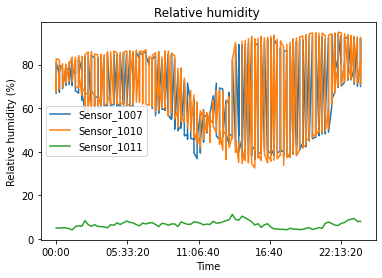

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
fig = plt.figure()

for frame in [sensor_1007,sensor_1010,sensor_1011]:
    plt.plot(frame['Time'], frame['value'])


plt.legend(['Sensor_1007','Sensor_1010','Sensor_1011'])
plt.xlabel("Time")
plt.ylabel("Relative humidity (%)")

plt.title("Relative humidity ")


plt.show()